# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

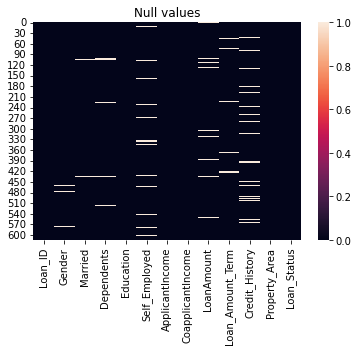

In [6]:
# cheaking the null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [7]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sum()

149

In [9]:
df.drop(['Loan_ID'],axis=1,inplace=True) 

In [10]:
df.shape

(614, 12)

In [11]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


#### Replacing null values with mean and mode values



In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [13]:
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)

In [14]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## EDA

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

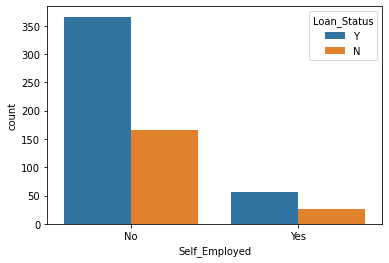

In [16]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

most people are not employed

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

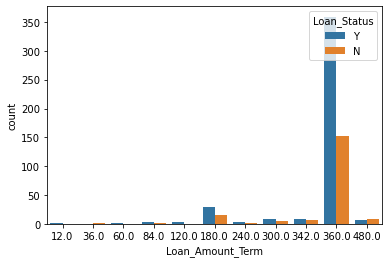

In [17]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved People those are taking loan for 480 months

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

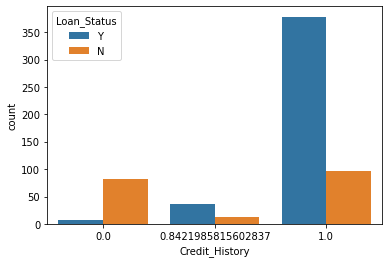

In [18]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

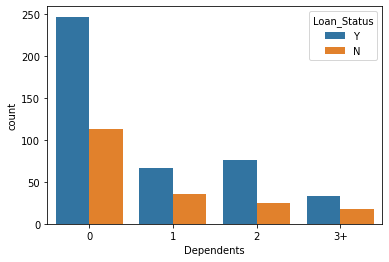

In [19]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

people who are independent are geting loan more than dependent people

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

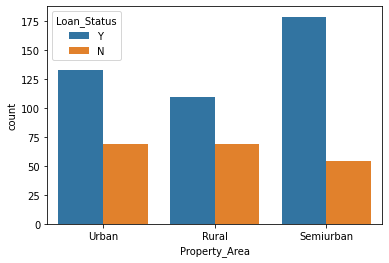

In [20]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

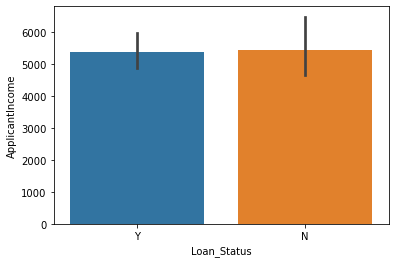

In [21]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

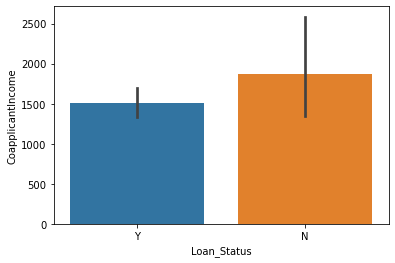

In [22]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:>

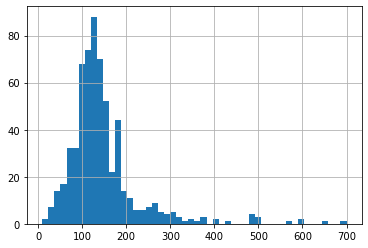

In [23]:
df['LoanAmount'].hist(bins=50)


In [24]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,0.031121,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,0.031057,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.000862,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.069148,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,0.005927,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.036718,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,0.051218,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.045040,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.075963,-0.066941,0.085191
Credit_History,0.031121,0.031057,0.000862,0.069148,0.005927,0.036718,0.051218,0.045040,0.075963,1.000000,-0.058622,0.280181


<AxesSubplot:>

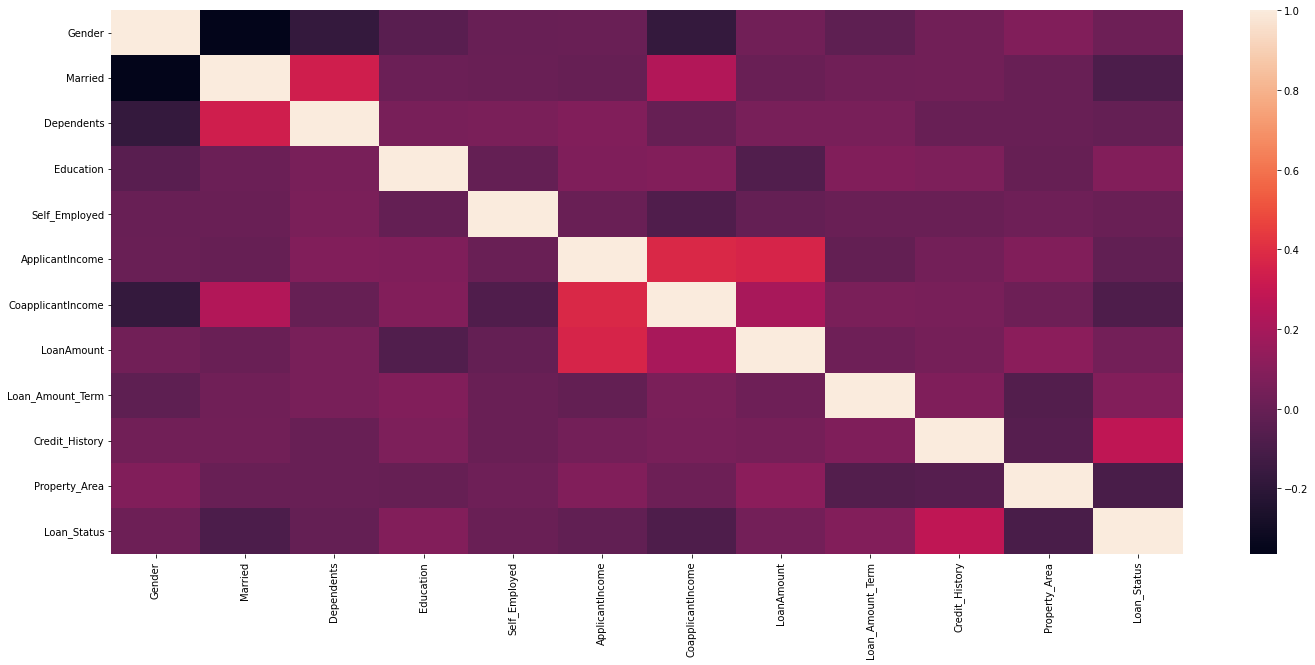

In [25]:
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

In [27]:
#Checking if our balanced or not

df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

This clearly shows our data is little imbalanced, we need to balance our data using SMOTE

Let's balance our data now



In [28]:
# Let us know split our data into Features & labels

x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [35]:
# Now let's split our data into Train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=44)

In [36]:
y_train.value_counts()

Y    306
N    154
Name: Loan_Status, dtype: int64

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [63]:
model=LogisticRegression()